In [1]:
import wrapper
import kemeny
import matplotlib.pyplot as plt
import numpy as np
import time
import functools
from data_sets_generator import generate_votes

In [2]:
def measure_time():
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            start_time = time.perf_counter()
            result = func(*args, **kwargs)
            end_time = time.perf_counter()
            execution_time = end_time - start_time
            return execution_time
        return wrapper
    return decorator

In [4]:
def plot(results1: list[list[float]], results2: list[list[float]], names: list[str], xlabels: list[str], labels: list[str], title: str) -> None:
    means1 = [np.mean(inner_list) for inner_list in results1]
    means2 = [np.mean(inner_list) for inner_list in results2]

    plt.plot(xlabels, means1)
    plt.plot(xlabels, means2)

    plt.title(title)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend(names)

    plt.show()

In [5]:
no_candidates = [i for i in range(2, 10)]
no_votes = 20
vote_sets = [[generate_votes(no_votes, num_candidates) for _ in range(10)] for num_candidates in no_candidates]

In [6]:
mapel_times, c_times = [[] for _ in range(len(no_candidates))], [[] for _ in range(len(no_candidates))]
mapel_kemeny = measure_time()(kemeny.kemeny_ranking)
c_kemeny = measure_time()(wrapper.kemeny_ranking)

In [7]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_kemeny(vote_sets[i][j]))

(0, 1) 0.35
(1, 0) 0.35
(0, 1) 0.4
(0, 1) 0.5
(1, 0) 0.3
(0, 1) 0.5
(0, 1) 0.5
(0, 1) 0.30000000000000004
(0, 1) 0.25
(0, 1) 0.5
(0, 1, 2) 1.25
(1, 0, 2) 1.3
(0, 1, 2) 1.1
(0, 2, 1) 1.35
(0, 2, 1) 1.3499999999999999
(1, 0, 2) 1.3499999999999999
(0, 1, 2) 1.2
(1, 2, 0) 1.2
(1, 2, 0) 1.2
(0, 2, 1) 1.3
(1, 0, 3, 2) 2.4499999999999997
(0, 2, 3, 1) 2.25
(2, 0, 1, 3) 2.45
(2, 1, 0, 3) 2.3499999999999996
(3, 0, 1, 2) 2.25
(1, 2, 0, 3) 2.55
(3, 0, 1, 2) 2.45
(1, 2, 0, 3) 2.35
(1, 0, 2, 3) 2.05
(0, 1, 2, 3) 2.65
(2, 0, 3, 1, 4) 4.05
(4, 1, 2, 0, 3) 4.25
(1, 4, 2, 0, 3) 3.9499999999999997
(2, 3, 4, 0, 1) 3.3499999999999996
(3, 0, 1, 4, 2) 2.95
(0, 4, 1, 2, 3) 3.8499999999999996
(2, 1, 4, 3, 0) 4.1
(1, 2, 4, 0, 3) 3.8000000000000003
(1, 2, 0, 3, 4) 4.35
(3, 0, 4, 2, 1) 3.7
(0, 3, 5, 1, 2, 4) 6.4
(3, 5, 0, 2, 4, 1) 5.800000000000001
(3, 5, 4, 1, 2, 0) 6.350000000000001
(4, 1, 0, 5, 2, 3) 5.9
(0, 3, 2, 4, 5, 1) 6.8500000000000005
(5, 4, 0, 2, 3, 1) 6.65
(4, 5, 2, 0, 3, 1) 6.850000000000001
(1, 3, 4

In [8]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_kemeny(vote_sets[i][j]))

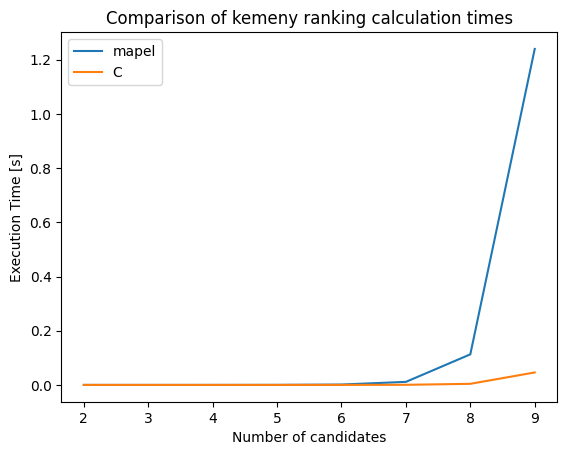

In [9]:
plot(mapel_times, c_times, ['mapel', 'C'], no_candidates, ["Number of candidates", "Execution Time [s]"], "Comparison of kemeny ranking calculation times")

In [10]:
no_candidates = [10*i for i in range(1, 11)]
no_votes = 1000
vote_sets = [[generate_votes(no_votes, num_candidates) for _ in range(10)] for num_candidates in no_candidates]

In [11]:
mapel_times, c_times = [[] for _ in range(len(no_candidates))], [[] for _ in range(len(no_candidates))]
mapel_agreement = measure_time()(kemeny.agreement_index)
c_agreement = measure_time()(wrapper.agreement_index)

In [12]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_agreement(vote_sets[i][j]))

In [13]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_agreement(vote_sets[i][j]))

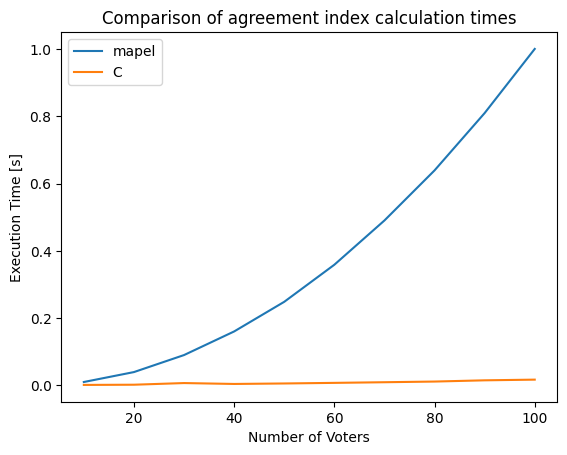

In [14]:
plot(mapel_times, c_times, ['mapel', 'C'], no_candidates, ["Number of Voters", "Execution Time [s]"], "Comparison of agreement index calculation times")

In [ ]:
no_candidates = [2*i for i in range(1, 3)]
no_votes = 1000
vote_sets = [[generate_votes(no_votes, num_candidates) for _ in range(3)] for num_candidates in no_candidates]

In [ ]:
mapel_times, c_times = [[] for _ in range(len(no_candidates))], [[] for _ in range(len(no_candidates))]
mapel_polarization = measure_time()(kemeny.polarization_index)
c_polarization = measure_time()(wrapper.polarization_index)

In [ ]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        mapel_times[i].append(mapel_polarization(vote_sets[i][j]))

In [ ]:
for i in range(len(vote_sets)):
    for j in range(len(vote_sets[i])):
        c_times[i].append(c_polarization(vote_sets[i][j]))
print(c_polarization(vote_sets[0][0]))

In [ ]:
plot(mapel_times, c_times, ['mapel', 'C'], no_candidates, ["Number of Voters", "Execution Time [s]"], "Comparison of polarization index calculation times")